# Assignment 6:  Due Thursday 10/10

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [6]:
in_path = %pwd
in_file = in_path + '/nobel.csv'
nobel_data = pd.read_csv(in_file)

# 1b)

Display below the output from the DataFrame functions *info*.

In [7]:
print(nobel_data.info)

<bound method DataFrame.info of      year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
906  2016    Medicine  The Nobel Prize in Physiology or Medicine 2016   
907  2016       Peace                      The Nobel Peace Prize 2016   
908  2016     Physics                 The Nobel Prize in Physics 2016   
909  2016     Physics                 The Nobel Prize in Physics 2016   
910  2016     Physics                 The Nobel Prize in Physics 2016   

                                            motivation prize_share  \
0    "in recognition 

# 1c)

Show the first 5 listings of the dataset.

In [8]:
print(nobel_data.head(5))

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [13]:
nobel_data.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [15]:
print('total number of Null Values :',nobel_data.isna().sum().sum())

total number of Null Values : 1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

1940 had the least amount of prizes awarded


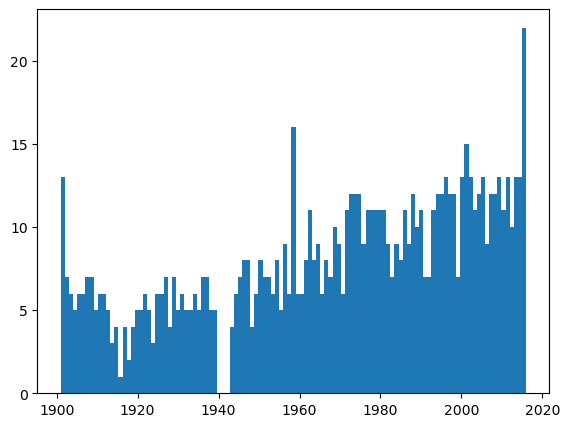

In [63]:
awards_per_year = nobel_data.groupby('year').agg({'prize': pd.Series.count});
# print(awards_per_year.index)
# print(awards_per_year.prize)

fig3 = plt.figure()
ax3 = fig3.add_axes([0.15, 0.1, 0.8, 0.8])
ax3.hist(awards_per_year.index, bins=113, weights=awards_per_year.prize);

print('1940 had the least amount of prizes awarded')

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [88]:
print(nobel_data.groupby('category').agg({'prize': 'count'}))

            prize
category         
Chemistry     175
Economics      78
Literature    113
Medicine      211
Peace         130
Physics       204


In [89]:
print('medicine has the most prizes')

medicine has the most prizes


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [106]:
prizes_given_to_percents = nobel_data.groupby('prize_share').agg({'prize': 'count'})

prizes_given_to_percents.prize.sum()

print('1/1 percent: ', round(100*prizes_given_to_percents.prize['1/1']/(prizes_given_to_percents.prize.sum()), 2))
print('1/2 percent: ', round(100*prizes_given_to_percents.prize['1/2']/(prizes_given_to_percents.prize.sum()), 2))
print('1/3 percent: ', round(100*prizes_given_to_percents.prize['1/3']/(prizes_given_to_percents.prize.sum()), 2))
print('1/4 percent: ', round(100*prizes_given_to_percents.prize['1/4']/(prizes_given_to_percents.prize.sum()), 3))


1/1 percent:  37.76
1/2 percent:  33.59
1/3 percent:  22.06
1/4 percent:  6.586


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

number of prizes given to women: 49
number of prizes given to men: 836


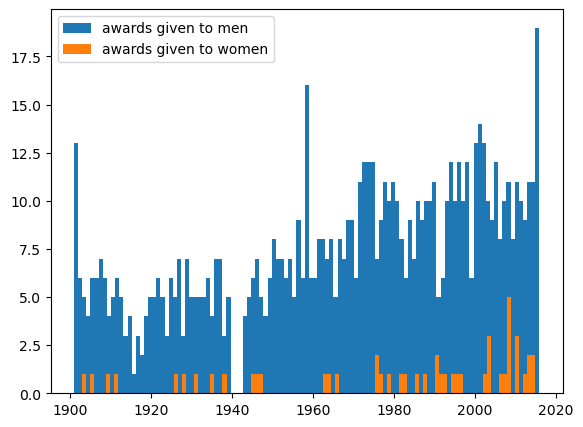

In [123]:
prizes_given_to_genders = nobel_data.groupby('sex').agg({'prize': 'count'})
print('number of prizes given to women:',prizes_given_to_genders.prize['Female'])
print('number of prizes given to men:',prizes_given_to_genders.prize['Male'])

awards_given_to_women = nobel_data[nobel_data['sex']=='Female']
awards_given_to_men = nobel_data[nobel_data['sex']=='Male']

women_awards_per_year = awards_given_to_women.groupby('year').agg({'prize': pd.Series.count});
men_awards_per_year = awards_given_to_men.groupby('year').agg({'prize': pd.Series.count});

fig6 = plt.figure()
ax6 = fig6.add_axes([0.15, 0.1, 0.8, 0.8])
ax6.hist(men_awards_per_year.index, bins=113, weights=men_awards_per_year.prize, label='awards given to men')
ax6.hist(women_awards_per_year.index, bins=113, weights=women_awards_per_year.prize, label='awards given to women')
ax6.legend();

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [138]:
awards_given_to_US_born = nobel_data[nobel_data['birth_country'] == 'United States of America']
# print(awards_given_to_US_born)

sum_US_born_awards = awards_given_to_US_born.groupby('year').agg({'prize': pd.Series.count}).sum()
print('there were',sum_US_born_awards['prize'],'people born in US who were awarded')

there were 259 people born in US who were awarded


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [179]:
age_when_awarded = (nobel_data['year'] - pd.DatetimeIndex(nobel_data['birth_date']).year)
# print(age_when_awarded)

oldest = 0
youngest = 999
oldest_index = 0
youngest_index = 0

for i in range(len(age_when_awarded)):
    if age_when_awarded[i] > oldest:
        oldest = age_when_awarded[i]
        oldest_index = i
    if age_when_awarded[i] < youngest:
        youngest = age_when_awarded[i]
        youngest_index = i
        
names = nobel_data['full_name']

print('age', oldest, names[oldest_index])
print('age', youngest, names[youngest_index])

age 90.0 Leonid Hurwicz
age 17.0 Malala Yousafzai


In [180]:
print('mean age:', round(age_when_awarded.sum()/910, 1))

standard_diviation = np.sqrt( np.sum((age_when_awarded - age_when_awarded.sum()/910)**2)/910 )
print('standard_diviation',standard_diviation)

mean age: 57.7
standard_diviation 12.330093464608987


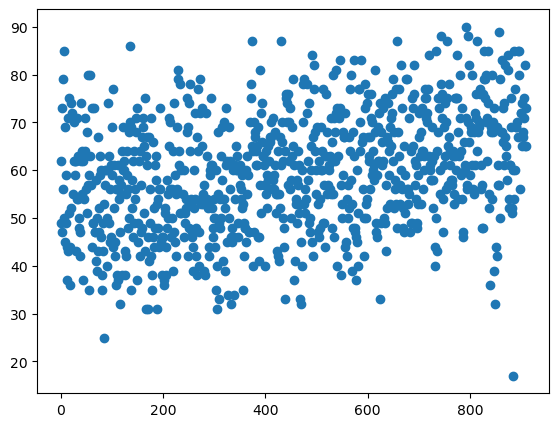

In [216]:
x = np.arange(len(age_when_awarded))

fig8 = plt.figure()
ax8 = fig8.add_axes([0.15, 0.1, 0.8, 0.8])
ax8.scatter(x, age_when_awarded)

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [207]:
copy_of_nobel_data = nobel_data
nobel_data.drop('laureate_id', axis=1, inplace=True)

In [208]:
nobel_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [209]:
nobel_data['age when awarded'] = age_when_awarded

In [210]:
nobel_data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age when awarded
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0
